In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance
from IPython.display import HTML

**11.1.2. 実行例**

In [26]:
import jinja2
import numpy as np
import scipy.spatial.distance

# 距離行列を計算する関数
def distance_matrix(X):
    return np.abs(X[:, None] - X).astype(float)

# Single Linkage法によるクラスターの統合
def merge_cluster_single(D, C, i, j):
    # 距離行列のコピーを作成
    newD = np.copy(D)
    # 対角成分をNaN（非数）に設定
    np.fill_diagonal(newD, np.nan)
    # クラスターiとクラスターjの距離の最小値を計算
    d = np.nanmin(np.array([newD[i], newD[j]]), axis=0)
    newD[i] = d
    newD[:, i] = d
    # クラスターjを削除
    newD = np.delete(newD, j, 0)
    newD = np.delete(newD, j, 1)
    # 対角成分を0に設定
    np.fill_diagonal(newD, 0)

    # クラスターの統合
    newC = list(C)
    newC[i] = set(sorted(newC[i] | newC[j]))
    del newC[j]
    return newD, tuple(newC)

# 距離行列からHTML形式の距離表を生成する関数
def generate_distance_table(D, C):
    # HTMLテンプレート
    template = """
    <table>
    <tr>
      <th width="120px"></th>
      {% for item in C %}
      <th width="120px">{{ item }}</th>
      {% endfor %}
    </tr>
    {% for row in D %}
    <tr>
      <th>{{ C[loop.index0] }}</th>
      {% for v in row %}
      {% if v == minvalue %}
      <td style="text-decoration: underline; color: red;">{{ v }}</td>
      {% else %}
      <td>{{ v }}</td>
      {% endif %}
      {% endfor %}
    </tr>
    {% endfor %}
    </table>
    """
    tmpl = jinja2.Template(template)

    # 距離行列内の最小値を取得
    minvalue = np.min(scipy.spatial.distance.squareform(D)) if D.size > 1 else 0.
    return tmpl.render(D=D.astype(int), C=C, minvalue=minvalue)


In [27]:
X = np.array([2, 11, 5, 1, 7])
C = tuple([{x,} for x in X])
D = distance_matrix(X)
HTML(generate_distance_table(D, C))

,{2},{11},{5},{1},{7}
{2},0,9,3,1,5
{11},9,0,6,10,4
{5},3,6,0,4,2
{1},1,10,4,0,6
{7},5,4,2,6,0


In [28]:
D2, C2 = merge_cluster_single(D, C, 0, 3)
HTML(generate_distance_table(D2, C2))

,"{1, 2}",{11},{5},{7}
"{1, 2}",0,9,3,5
{11},9,0,6,4
{5},3,6,0,2
{7},5,4,2,0


In [29]:
D3, C3 = merge_cluster_single(D2, C2, 2, 3)
HTML(generate_distance_table(D3, C3))

,"{1, 2}",{11},"{5, 7}"
"{1, 2}",0,9,3
{11},9,0,4
"{5, 7}",3,4,0


In [30]:
D4, C4 = merge_cluster_single(D3, C3, 0, 2)
HTML(generate_distance_table(D4, C4))

,"{1, 2, 5, 7}",{11}
"{1, 2, 5, 7}",0,4
{11},4,0


In [31]:
D5, C5 = merge_cluster_single(D4, C4, 0, 1)
HTML(generate_distance_table(D5, C5))

,"{1, 2, 5, 7, 11}"
"{1, 2, 5, 7, 11}",0


**11.1.3 デンドログラム**

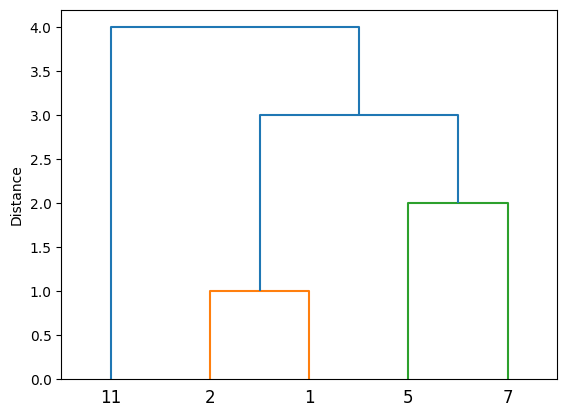

In [32]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'single')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

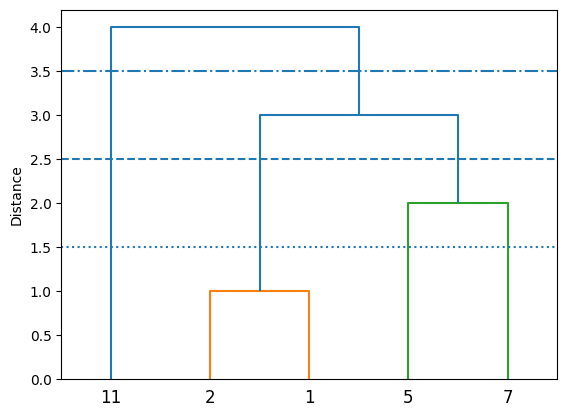

In [33]:
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
left, right = ax.get_xlim()
plt.hlines([1.5], left, right, linestyles='dotted')
plt.hlines([2.5], left, right, linestyles='dashed')
plt.hlines([3.5], left, right, linestyles='dashdot')
ax.set_ylabel("Distance")
plt.show()

**11.3.1 最短距離法**

In [34]:
from sklearn import datasets
P, q, centers = datasets.make_blobs(n_samples=15, centers=2, random_state=27, return_centers=True)
C0 = P[q == 0]
C1 = P[q == 1]
D = np.sqrt(((C0[:, None] - C1) ** 2).sum(2))
cmap = plt.get_cmap("tab10")

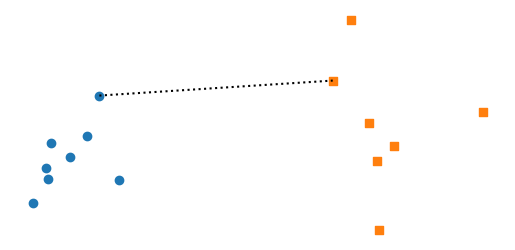

In [35]:
i, j = np.unravel_index(np.argmin(D), D.shape)

fig, ax = plt.subplots(dpi=100)
ax.scatter(C0[:,0], C0[:,1], color=cmap(0), marker='o')
ax.scatter(C1[:,0], C1[:,1], color=cmap(1), marker='s')
ax.plot([C0[i][0], C1[j][0]], [C0[i][1], C1[j][1]], linestyle=':', color='black')
ax.set_aspect('equal')
ax.axis("off")
plt.show()

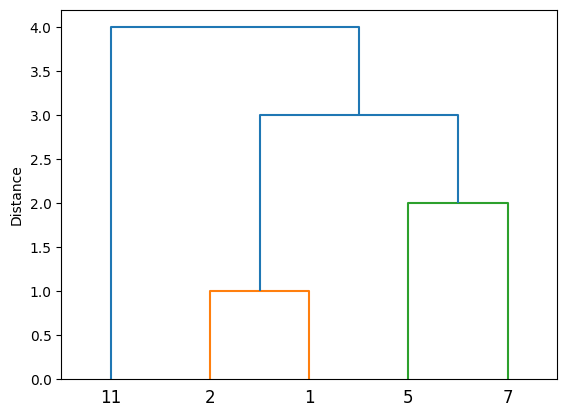

In [36]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'single')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

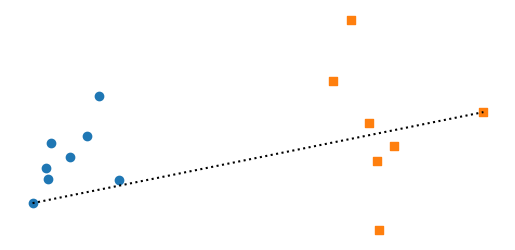

In [37]:
i, j = np.unravel_index(np.argmax(D), D.shape)

fig, ax = plt.subplots(dpi=100)
ax.scatter(C0[:,0], C0[:,1], color=cmap(0), marker='o')
ax.scatter(C1[:,0], C1[:,1], color=cmap(1), marker='s')
ax.plot([C0[i][0], C1[j][0]], [C0[i][1], C1[j][1]], linestyle=':', color='black')
ax.set_aspect('equal')
ax.axis("off")
plt.show()

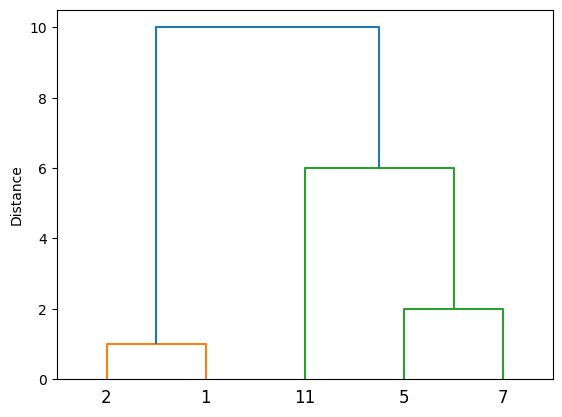

In [38]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'complete')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**11.3.3 群平均法**

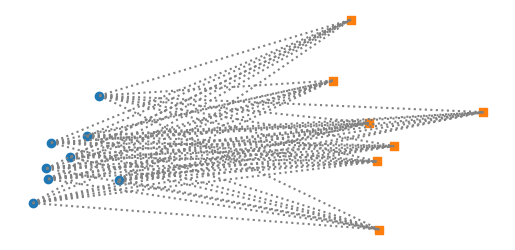

In [39]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(C0[:,0], C0[:,1], color=cmap(0), marker='o')
ax.scatter(C1[:,0], C1[:,1], color=cmap(1), marker='s')
for i in range(C0.shape[0]):
    for j in range(C1.shape[0]):
        ax.plot([C0[i][0], C1[j][0]], [C0[i][1], C1[j][1]], linestyle=':', color='gray')
ax.set_aspect('equal')
ax.axis("off")
plt.show()

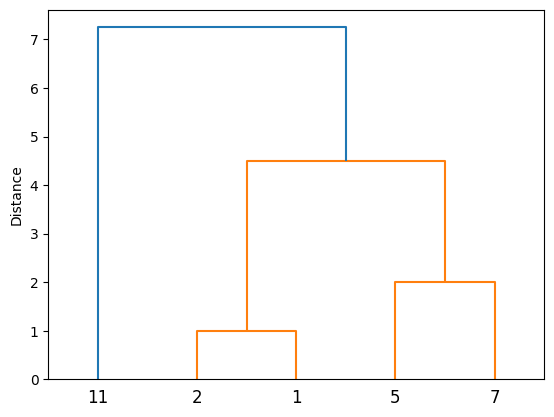

In [40]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'average')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**11.3.4. 重心法**

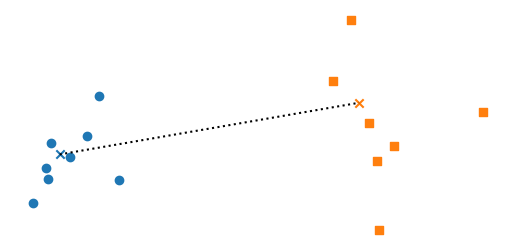

In [41]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(C0[:,0], C0[:,1], color=cmap(0), marker='o')
ax.scatter(C1[:,0], C1[:,1], color=cmap(1), marker='s')
ax.scatter(centers[:1,0], centers[:1,1], color=cmap(0), marker='x')
ax.scatter(centers[1:,0], centers[1:,1], color=cmap(1), marker='x')
ax.plot(centers[:,0], centers[:,1], linestyle=':', color='black')
ax.set_aspect('equal')
ax.axis("off")
plt.show()

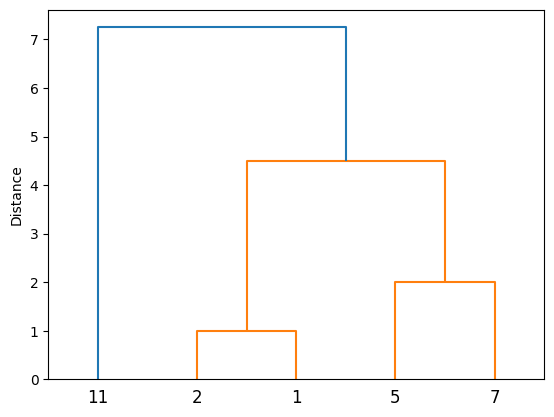

In [42]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'centroid')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**11.3.5. ウォード法**

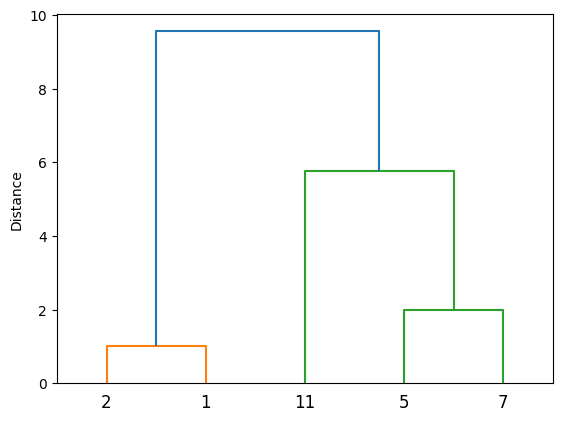

In [43]:
Z = scipy.cluster.hierarchy.linkage(X[:,None], 'ward')

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**11.4. SciPyでの実装例**

In [44]:
X_ = np.array([2, 11, 5, 1, 7])

X = X_[:,None]
X

array([[ 2],
       [11],
       [ 5],
       [ 1],
       [ 7]])

**11.4.1 距離行列を求める**

In [45]:
# データポイント間のマンハッタン距離を計算
D = scipy.spatial.distance.pdist(X, 'cityblock')
D

array([ 9.,  3.,  1.,  5.,  6., 10.,  4.,  4.,  2.,  6.])

In [46]:
# マンハッタン距離行列を正方形の形式に変換
D_square = scipy.spatial.distance.squareform(D)

'''        2    11   5    1    7
2  array([[ 0.,  9.,  3.,  1.,  5.],      0
11        [ 9.,  0.,  6., 10.,  4.],      1
5        [ 3.,  6.,  0.,  4.,  2.],       2
1        [ 1., 10.,  4.,  0.,  6.],       3
7        [ 5.,  4.,  2.,  6.,  0.]])      4'''

array([[ 0.,  9.,  3.,  1.,  5.],
       [ 9.,  0.,  6., 10.,  4.],
       [ 3.,  6.,  0.,  4.,  2.],
       [ 1., 10.,  4.,  0.,  6.],
       [ 5.,  4.,  2.,  6.,  0.]])

**11.4.2. クラスタリングの実行**

In [47]:
# 最短距離法による階層的クラスタリングを実行
Z = scipy.cluster.hierarchy.linkage(D, 'single')
Z

'''      [結合される行, 結合される行, 距離, クラスタ数]
    array([[0., 3., 1., 2.],      5      [ 0.,  9.,  3.,  1.,  5.]と[ 1., 10.,  4.,  0.,  6.]
          [2., 4., 2., 2.],       6      [ 3.,  6.,  0.,  4.,  2.]と[ 5.,  4.,  2.,  6.,  0.]
          [5., 6., 3., 4.],       7      5と6の結果
          [1., 7., 4., 5.]])      8      [ 9.,  0.,  6., 10.,  4.]と7の結果'''

array([[0., 3., 1., 2.],
       [2., 4., 2., 2.],
       [5., 6., 3., 4.],
       [1., 7., 4., 5.]])

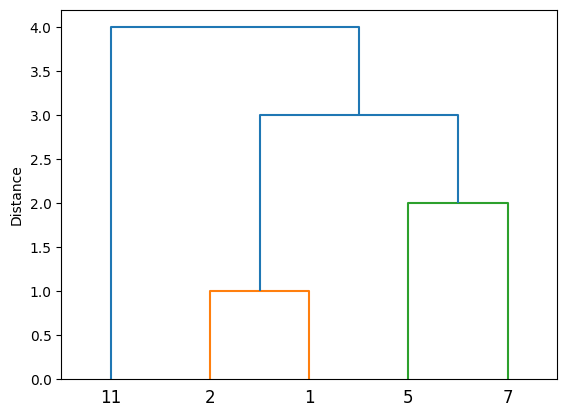

In [48]:
# デンドログラムの可視化（クラスタリングの結果を樹形図で表示）
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

In [50]:
# クラスタリング結果の出力と閾値に基づくクラスタの割り当て
print(X_)
print(scipy.cluster.hierarchy.fcluster(Z, t=1.5, criterion='distance'))
print(scipy.cluster.hierarchy.fcluster(Z, t=2.5, criterion='distance'))
print(scipy.cluster.hierarchy.fcluster(Z, t=3.5, criterion='distance'))
print(scipy.cluster.hierarchy.fcluster(Z, t=4.5, criterion='distance'))
print(scipy.cluster.hierarchy.fcluster(Z, t=3, criterion='maxclust'))

[ 2 11  5  1  7]
[1 4 2 1 3]
[1 3 2 1 2]
[1 2 1 1 1]
[1 1 1 1 1]
[1 3 2 1 2]


In [51]:
# Complete Linkage法による階層的クラスタリングを実行（マンハッタン距離を使用）
Z = scipy.cluster.hierarchy.linkage(X, 'complete', metric='cityblock')
Z

array([[ 0.,  3.,  1.,  2.],
       [ 2.,  4.,  2.,  2.],
       [ 1.,  6.,  6.,  3.],
       [ 5.,  7., 10.,  5.]])

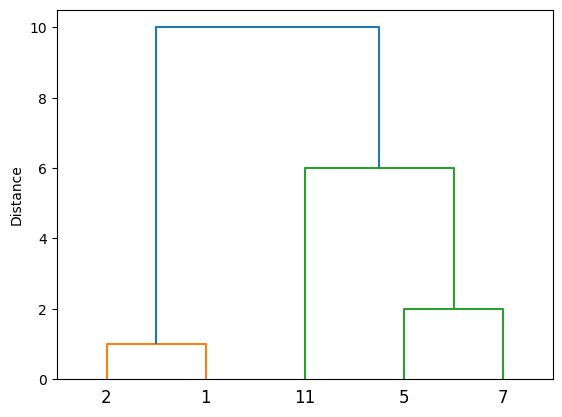

In [52]:
# デンドログラムの可視化（クラスタリングの結果を樹形図で表示）
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**11.5. 自前で実装**

In [53]:
X_ = np.array([2, 11, 5, 1, 7])
X = X_[:,None]
X

array([[ 2],
       [11],
       [ 5],
       [ 1],
       [ 7]])

In [54]:
def distance_matrix_L1(X):
    # 距離行列を初期化。行数と列数はデータポイントの数
    D = np.zeros((X.shape[0], X.shape[0]), dtype=np.float)

    # 全てのデータポイントのペアについて距離を計算
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            # X[i]とX[j]の要素ごとの差の絶対値の総和を計算して距離
            D[i, j] = np.abs(X[i] - X[j]).sum()

    return D


In [55]:
import numpy as np

def single_linkage(D):
    C = np.ones(len(D) * 2 - 1)  # クラスタの要素数を記録する配列を初期化
    Z = np.zeros((len(D)-1, 4), dtype=np.float)  # リンケージ行列を初期化
    M = np.pad(D, (0, len(D)-1), constant_values=np.inf)  # 距離行列を初期化
    np.fill_diagonal(M, np.inf)  # 対角要素を無限大に設定

    print("* t=0")
    print(M)

    for t in range(len(D), len(D)*2 - 1):
        # 最も近いクラスタのペア (i,j) を見つける
        S = M[:t,:t]
        i, j = np.unravel_index(np.argmin(S), S.shape)
        print('argmin =', (i, j))

        # 新しいクラスタの要素数を記録
        C[t] = C[i] + C[j]

        # リンケージ行列に新しいクラスタを記録
        Z[t-len(D)] = (i, j, S[i,j], C[t])

        # iとjの距離を無限大にする
        M[((i,j), (j,i))] = np.inf

        # 新しいクラスタから他のクラスタへの距離を計算
        M[t] = np.minimum(M[i], M[j])
        M[:,t] = np.minimum(M[:,i], M[:,j])

        # クラスタiとjの距離を無限大にする
        M[i] = np.inf
        M[j] = np.inf
        M[:,i] = np.inf
        M[:,j] = np.inf

        print(f"* t={t}")
        print(M)

    return Z

In [56]:
D = distance_matrix_L1(X)
Z = single_linkage(D)

* t=0
[[inf  9.  3.  1.  5. inf inf inf inf]
 [ 9. inf  6. 10.  4. inf inf inf inf]
 [ 3.  6. inf  4.  2. inf inf inf inf]
 [ 1. 10.  4. inf  6. inf inf inf inf]
 [ 5.  4.  2.  6. inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]]
argmin = (0, 3)
* t=5
[[inf inf inf inf inf inf inf inf inf]
 [inf inf  6. inf  4.  9. inf inf inf]
 [inf  6. inf inf  2.  3. inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf  4.  2. inf inf  5. inf inf inf]
 [inf  9.  3. inf  5. inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]]
argmin = (2, 4)
* t=6
[[inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf  9.  4. inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf  9. inf inf inf inf  3. inf inf]
 [inf  4. in

<ipython-input-54-f3b5baf9ddf3>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  D = np.zeros((X.shape[0], X.shape[0]), dtype=np.float)
<ipython-input-55-a1fcd8a57698>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = np.zeros((len(D)-1, 4), dtype=np.float)  # リンケージ行列を初期化


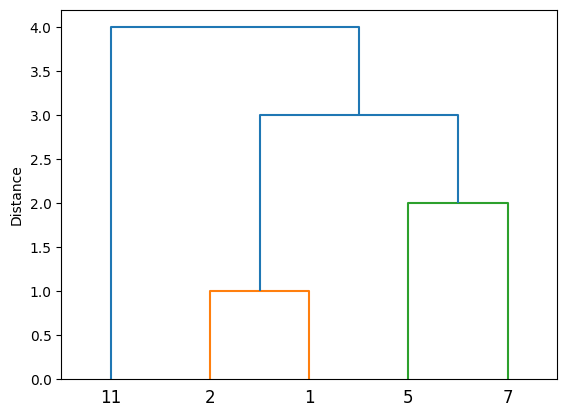

In [57]:
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

**確認問題**

In [58]:
import urllib
from pathlib import Path

URL = "https://www.nstac.go.jp/sys/files/SSDSE-C-2023.csv"
data_dir = Path("./data")
data_dir.mkdir(exist_ok=True)  # ディレクトリが存在しない場合にのみ作成
csv_path = data_dir / "ssdse-c-2022.csv"

csv = urllib.request.urlopen(URL).read().decode("shift-jis")

with csv_path.open(mode="w", encoding="utf-8") as f:
    f.write(csv)

In [59]:
import pandas as pd


raw_df = pd.read_csv(csv_path)

In [60]:
code_name = raw_df.iloc[0,:]  # コードの名称記載行を取得
df = raw_df.drop(0, axis=0) # 不要な行の削除
location_name = df.iloc[:,:3]  # 県庁所在地名を取得
location_name.set_index("SSDSE-C-2023", inplace=True)
df = df.drop(["2020-2022年", "City"], axis=1) # 不要な列の削除
df = df.set_index("SSDSE-C-2023")  # 県庁所在地のコードをindexにする
df = df.astype("float32")  # 数値型に変換

In [61]:
import scipy
import scipy.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def clustering(df, method, metric="euclidean"):
    # データの標準化
    _X = StandardScaler().fit_transform(df)

    # 距離行列の計算
    distance_matrix = scipy.spatial.distance.pdist(_X, metric=metric)

    # 階層的クラスタリングの実行
    cluster = scipy.cluster.hierarchy.linkage(distance_matrix, method=method, metric=metric)

    # デンドログラムのプロット
    figure, ax = plt.subplots(dpi=100)
    dn = scipy.cluster.hierarchy.dendrogram(cluster, labels=df.index, ax=ax)
    ax.set_ylabel("Distance")
    plt.show()

    return dn


**最短距離法**

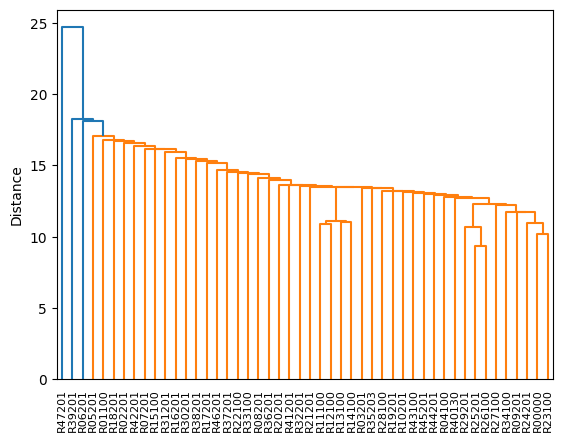

,R47201,R39201,R06201,R05201,R01100,R18201,R02201,R42201,R07201,R15100,...,R40130,R29201,R25201,R26100,R27100,R34100,R09201,R24201,R00000,R23100
0,那覇市,高知市,山形市,秋田市,札幌市,福井市,青森市,長崎市,福島市,新潟市,...,福岡市,奈良市,大津市,京都市,大阪市,広島市,宇都宮市,津市,全国,名古屋市


In [62]:
result = clustering(df, method="single")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().T

**最長距離法**

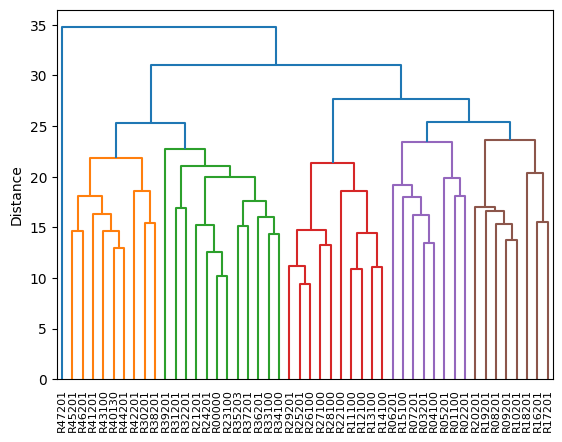

,R47201,R45201,R46201,R41201,R43100,R40130,R44201,R42201,R30201,R38201,...,R01100,R02201,R20201,R19201,R08201,R09201,R10201,R18201,R16201,R17201
0,那覇市,宮崎市,鹿児島市,佐賀市,熊本市,福岡市,大分市,長崎市,和歌山市,松山市,...,札幌市,青森市,長野市,甲府市,水戸市,宇都宮市,前橋市,福井市,富山市,金沢市


In [63]:
result = clustering(df, method="complete")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().T

**ウォード法**

In [64]:
result = clustering(df, method="ward")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().

SyntaxError: ignored